<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/data-science/1-7-pandas-data-exploration-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas on a real data set

* https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
* https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.__version__

'3.0.3'

In [2]:
import pandas as pd
pd.__version__

'0.24.2'

In [3]:
import numpy as np
np.__version__

'1.16.4'

In [4]:
import sklearn
sklearn.__version__

'0.21.2'

## Loading our data set
This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - blue: no accidents
* 2 - yellow: few accidents   

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/data/insurance-customers-1500.csv', sep=';')

In [6]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(1500, 4)

In [9]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


## Plots of a few samples give you a nice overview of your data

Pandas allows some SQL like operations: https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

In [0]:
sample_df = df.sample(n=150, random_state=42)

In [11]:
sample_df.describe()

,speed,age,miles,group
count,150.00000,150.000000,150.000000,150.000000
mean,121.40000,43.813333,29.800000,0.980000
std,18.36688,17.097190,14.942844,0.814878
min,89.00000,17.000000,1.000000,0.000000
25%,107.25000,31.000000,17.000000,0.000000
50%,118.00000,41.000000,28.000000,1.000000
75%,135.00000,52.000000,42.000000,2.000000
max,158.00000,90.000000,61.000000,2.000000


In [0]:
# https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#where
# select * from sample_df where group = 0 

bad = sample_df[sample_df['group'] == 0]
good = sample_df[sample_df['group'] == 1]
fair = sample_df[sample_df['group'] == 2]

In [0]:
from matplotlib.colors import ListedColormap

colors = ['#FF0000', '#0000FF', '#FFFF00']
cmap = ListedColormap(colors) 

labels = ["Many Accidents", "No Accidents", "Few Accidents"]
classes = [bad, good, fair]

### Scatter Plot

Text(0, 0.5, 'speed')

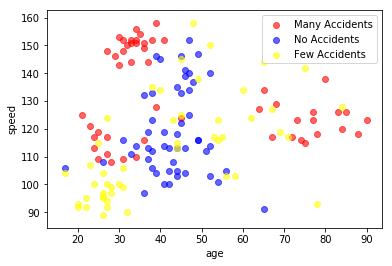

In [14]:
x_axis = 'age'
y_axis = 'speed'

for label, clazz, color in zip(labels, classes, colors):
    plt.scatter(
        clazz[x_axis], 
        clazz[y_axis],
        label=label,
        color=color,
        alpha=0.6)
    
plt.legend()
plt.xlabel(x_axis)
plt.ylabel(y_axis)

### Histograms

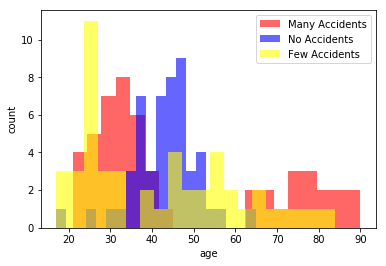

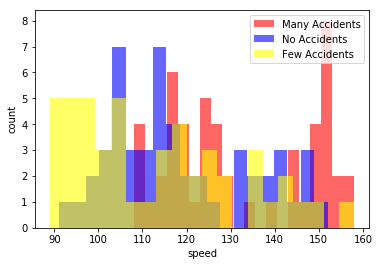

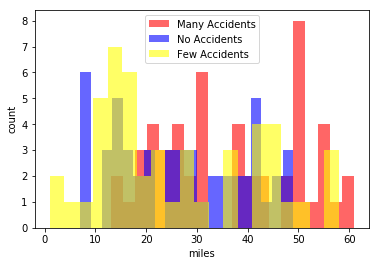

In [15]:
for field in ['age', 'speed', 'miles']:
    for label, clazz, color in zip(labels, classes, colors):
        plt.hist(clazz[field], 
                 label=label,
                 bins=20,
                 color=color,
                 alpha=0.6)
    plt.legend()
    plt.xlabel(field)
    plt.ylabel('count')
    plt.show()
    

### Scatter Matrix / Pairplot

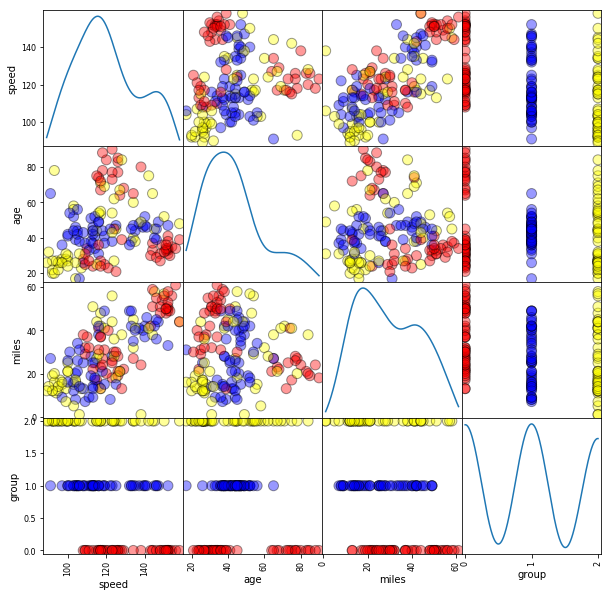

In [16]:
plots = pd.plotting.scatter_matrix(sample_df, 
                           diagonal='kde', 
                           cmap=cmap, 
                           c=sample_df.group, 
                           s=100, marker='o', edgecolors='k', alpha=0.4,
                           figsize=(10, 10))

## Exploration of data

In [17]:
df['group'].unique()

array([1, 0, 2])

In [18]:
len(df[df["age"].isna()])

0

In [19]:
df.groupby('group').size().sort_values()

group
2    499
1    500
0    501
dtype: int64

In [20]:
len(df[df['age'] > 60])

276

In [21]:
df[df.apply(lambda row: row['age'] > 60 and row['speed'] > 150, axis='columns')]

,speed,age,miles,group
26,159.0,86.0,38.0,2
192,155.0,69.0,53.0,2
1407,157.0,62.0,38.0,2


# Exercise: Data Analyzis

* How many young drivers (35 or younger) with fast cars (140 or faster) do you find: how are their scores?
* Plot them in a scatter plot
* You can choose to start from scratch or adapt the code below
* Find another meaningful analyzis involving the miles driven

In [22]:
young_and_fast = df[df.apply(lambda row: row['age'] < 30 and row['speed'] > 150, axis='columns')]
young_and_fast

,speed,age,miles,group
24,151.0,27.0,43.0,0
286,155.0,29.0,51.0,0
295,156.0,29.0,55.0,0
813,151.0,29.0,44.0,0
1023,155.0,29.0,48.0,0
1046,151.0,28.0,51.0,0
1111,151.0,27.0,45.0,0
1386,153.0,29.0,48.0,0


Text(0, 0.5, 'speed')

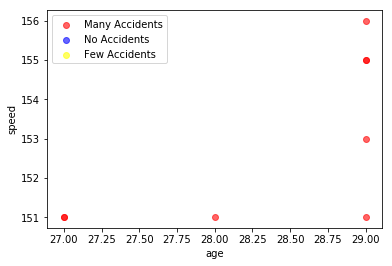

In [23]:
bad = young_and_fast[young_and_fast['group'] == 0]
good = young_and_fast[young_and_fast['group'] == 1]
fair = young_and_fast[young_and_fast['group'] == 2]

from matplotlib.colors import ListedColormap

colors = ['#FF0000', '#0000FF', '#FFFF00']
cmap = ListedColormap(colors) 

labels = ["Many Accidents", "No Accidents", "Few Accidents"]
classes = [bad, good, fair]

x_axis = 'age'
y_axis = 'speed'

for label, clazz, color in zip(labels, classes, colors):
    plt.scatter(
        clazz[x_axis], 
        clazz[y_axis],
        label=label,
        color=color,
        alpha=0.6)
    
plt.legend()
plt.xlabel(x_axis)
plt.ylabel(y_axis)

## Preparation for Training
* Which column do we want to predict?
* Splitting between training and test data 

In [0]:
# typical name for prediction
y = df['group']

In [25]:
y.head()

0    1
1    1
2    0
3    2
4    1
Name: group, dtype: int64

In [26]:
y.shape

(1500,)

In [27]:
type(y)

pandas.core.series.Series

In [0]:
X = df.drop('group', axis='columns')

In [29]:
X.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


In [30]:
X.shape

(1500, 3)

In [31]:
type(X)

pandas.core.frame.DataFrame

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [33]:
# we have (almost) the same number of samples per categoery 
# in the training...
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([401, 400, 399]))

In [34]:
# ... and test dataset
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))